In [2]:
import pandas as pd
import numpy as np
import abc
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from pandas.plotting import plot_params

## Task 1

In [274]:
df=pd.read_csv("earthquake.txt",sep=" ")

In [275]:
X,Y=df.iloc[:,1:df.shape[1]].to_numpy(),df.iloc[:,0].apply(lambda x: 1 if x=="equake" else 0).to_numpy()

In [297]:
def task_one_plot(X,Y):
    for x,y in zip(X,Y):
       plt.scatter(x[0],x[1],c="red" if y==1 else "blue",marker="$Q$" if y==1 else "$X$")
    plt.ylabel("Surface")
    plt.xlabel("Body")
    plt.show()

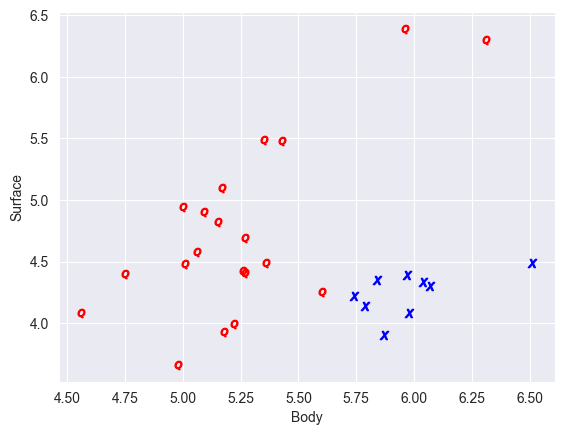

In [298]:
task_one_plot(X,Y)

In [324]:
no_reg_model=sklearn.linear_model.LogisticRegression(penalty=None)
reg_model=sklearn.linear_model.LogisticRegression(penalty="l2")

In [325]:
reg_model=reg_model.fit(X,Y)
no_reg_model=no_reg_model.fit(X,Y)

In [326]:
no_reg_coef=no_reg_model.coef_
reg_coef=reg_model.coef_
no_reg_B0=no_reg_model.intercept_[0]
reg_B0=reg_model.intercept_[0]

In [328]:
print("No regularization coeficiens")
print(no_reg_coef,no_reg_B0)
print("Regularized coeficiens")
print(reg_coef,reg_B0)

No regularization coeficiens
[[-111.91608035  117.54515973]] 135.04765907630477
Regularized coeficiens
[[-2.16922885  1.18171354]] 7.469377343160525


In [329]:
def calc_log_likelihood(X,Y,betha,betha0):
    return np.sum(Y*(np.dot(betha,X.T)+betha0)-np.log(1+np.exp(np.dot(betha,X.T)+betha0)))

In [330]:
ll1=calc_log_likelihood(X,Y,reg_coef,reg_B0)
ll2=calc_log_likelihood(X,Y,no_reg_coef,no_reg_B0)
print("loglikelihood, no reguralization:",ll2)
print("loglikelihood, reguralization:",ll1)

loglikelihood, no reguralization: -0.0014827399403015255
loglikelihood, reguralization: -8.425076253244171


In [285]:
#Helper function
def map_Y(Y):
    Yi=np.ndarray((Y.shape[0],2))
    for i in range(Y.shape[0]):
        if Y[i]==1:
            Yi[i,0]=0
            Yi[i,1]=1
        else:
            Yi[i,0]=1
            Yi[i,1]=0
    return Yi

## Task 2

In [272]:
def generate_data(n,Betas,Beta0,k=5):
    X=np.random.normal(0,1,(n,k))
    Y=np.random.binomial(1,1/(1+np.exp(-np.dot(Betas.T,X.T)-Beta0))).reshape(-1,)
    return X,Y

In [342]:
Beta0=0.5
Betas=np.array([1]*5).reshape(5,1)

In [381]:
def calc_MSE(Betas,Beta0,N=50,k=5,L=100):
    errors=np.array([])
    for i in range(L):
        X,Y=generate_data(N,Betas,Beta0,k=k)
        model=sklearn.linear_model.LogisticRegression().fit(X,Y)
        true_params=np.array(list(Betas.reshape(-1,))+[Beta0])
        estim_params=np.array([*model.coef_.reshape(-1,),*model.intercept_])
        errors=np.append(errors,np.sum((true_params-estim_params)**2))
    return errors.mean()

In [392]:
def task_two_k_features(k=5):
    Betas=np.array([1]*k).reshape(k,1)
    Beta0=0.5
    N1=np.array([int(x) for x in np.linspace(50,100,6)])
    N2=np.array([int(x) for x in np.linspace(200,1000,9)])
    N=np.concatenate((N1,N2))
    MSE=np.array([])
    for n in N:
        MSE=np.append(MSE,calc_MSE(Betas,Beta0,n,k=k))
    plt.plot(N,MSE)
    plt.title(f"MSE for k={k}")
    plt.xlabel("size N")
    plt.ylabel("MSE")
    plt.show()

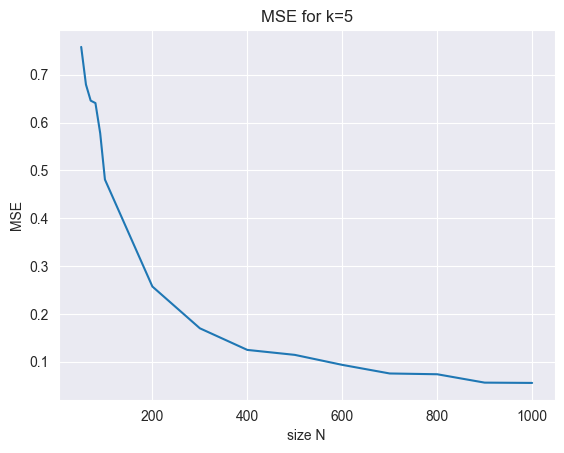

In [393]:
task_two_k_features(5)

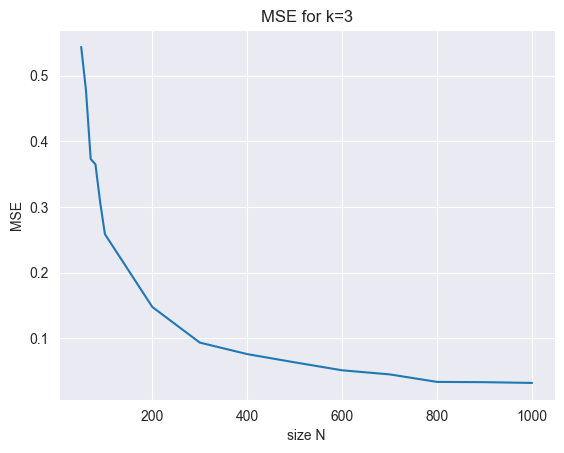

In [394]:
task_two_k_features(3)